<a href="https://colab.research.google.com/github/julienbonin/MachineLearningApplications/blob/master/TensorFlowModelOutput_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          0         1         2         3         4
0  0.025921  0.027759  0.029891  0.024324  0.038886
1  0.036835  0.037238  0.042120  0.036486  0.019866
2  0.042292  0.041977  0.048234  0.042568  0.010356
3  0.045020  0.044347  0.051291  0.045608  0.005601
4  0.046385  0.045531  0.052819  0.047128  0.003223
778
[[[0.02592087 0.02775897 0.0298913  0.02432432 0.038886  ]]

 [[0.03683492 0.03723764 0.04211957 0.03648649 0.01986592]]

 [[0.04229195 0.04197698 0.0482337  0.04256757 0.01035588]]

 ...

 [[0.80763984 0.81855112 0.8111413  0.80675676 0.0294274 ]]

 [[0.80627558 0.79959377 0.80163043 0.79256757 0.02104896]]

 [[0.7994543  0.79959377 0.80027174 0.79459459 0.01769416]]]
[3.64864865e-02 4.25675676e-02 4.56081081e-02 4.71283784e-02
 4.86486486e-02 0.00000000e+00 2.02702703e-02 3.04054054e-02
 3.54729730e-02 3.80067568e-02 3.92736486e-02 4.05405405e-02
 1.35135135e-05 1.14864865e-02 2.83783784e-02 7.56756757e-02
 8.64864865e-02 8.78378378e-02 9.39189189e-02 1.00000000e-01
 1.1925

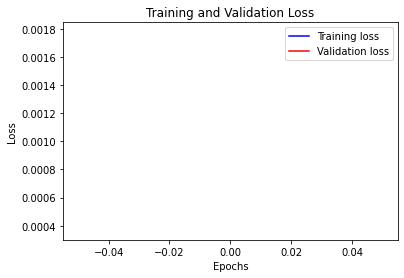


::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
                                                   0
0  [[[38.67, 38.82, 38.11, 38.51, 87487.5]], [[38...
1  [38.38, 38.33750000000001, 38.31625, 38.295, 3...
           0
0  38.099724
1  37.032307
2  37.355240
3  37.934467
4  38.383751
             0  new_index
0    38.099724       1555
1    37.032307       1556
2    37.355240       1557
3    37.934467       1558
4    38.383751       1559
..         ...        ...
383  37.734715       1938
384  37.994583       1939
385  37.668549       1940
386  37.752895       1941
387  37.795197       1942

[388 rows x 2 columns]
                   0    new_col
new_index                      
1555       38.099724  38.099724
1556       37.032307  37.032307
1557       37.355240  37.355240
1558       37.934467  37.934467
1559       38.383751  38.383751
...              ...        ...
1938       37.734715  37.734715
1939       37.994583  37.994583
1940       37.668549  37.668549
1941     

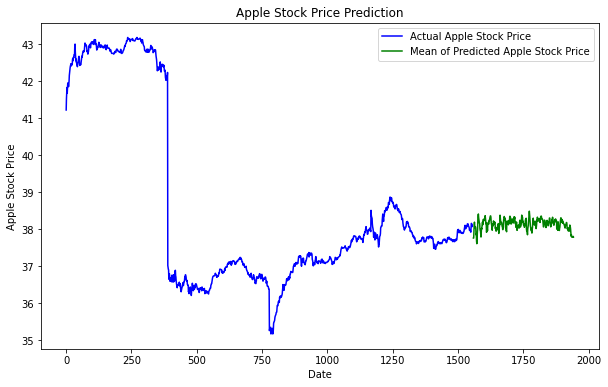

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

num_time_steps = 389

df = pd.read_csv("https://raw.githubusercontent.com/julienbonin/MachineLearningApplications/master/qqqqqqqqqqqqqqqq.csv")

train_size = int(len(df) * 0.50)
test_size = len(df) - train_size
#
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
test_df=test
# print(len(train), len(test))
#
time_steps = 389
test_time_steps = 389
#
# # # reshape to [samples, time_steps, n_features]
train = train.drop(columns=['date'])
train = train.to_numpy()
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
train = pd.DataFrame(data=train)
#
test = test.drop(columns=['date'])
test = test.to_numpy()
scaler = MinMaxScaler(feature_range=(0, 1))
test = scaler.fit_transform(test)
test = pd.DataFrame(data=test)

print(test.head())
#
#


def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


# print(df.head())
#
print(len(test))
if len(test) <= time_steps:
    test_time_steps = len(test) - 1
    print(test_time_steps)
#
X_train, y_train = create_dataset(train, train[3], time_steps)
X_test, y_test = create_dataset(test, test[3], 1)
#
# print(len(test))
# print(X_train.shape, y_train.shape)
print(X_test)
print(y_test)

split_fraction = 0.725
train_split = int(split_fraction * int(df.shape[0]))
step = 10
past = len(df)
future = 389
learning_rate = 0.00001
batch_size = 389
epochs = 1

#
#ignore this...for gpu training only
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [
    tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    data=test.index,
    targets=test[3],
    sequence_length=10,
    sampling_rate=1,
    batch_size=64,
)
print("data", dataset_val)
#
#
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_out = keras.layers.LSTM(len(train))(inputs)
outputs = keras.layers.Dense(1)(lstm_out)
#
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="mse")
model.summary()
#
#
# # model = keras.Sequential()
#
# model.add(keras.layers.Dense(round(len(train) / 2), activation=params['activation'], kernel_initializer='normal'))
# model.add(Dropout(params['dropout']))
# model.add(keras.layers.Dense(389, activation='sigmoid'))
# model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=0.00001), )
#
#
#
#
#
# # model = KerasClassifier(build_fn=create_model)
#
path_checkpoint = "model_checkpoints\checkpoint.h5"
#
#
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=False,
    save_best_only=False,
)
#
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=16,
    validation_split=0.1,
    validation_data=dataset_val,
    verbose=1,
    shuffle=True,
    callbacks=modelckpt_callback,
)


#

#
#
#
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


#
visualize_loss(history, "Training and Validation Loss")



print()

df = df.drop(columns=['date'])
small_df = df[-389:]
X_test = create_dataset(small_df, small_df['4. close'], 1)



y_pred = model.predict(X_test)
scaler.min_,scaler.scale_=scaler.min_[0],scaler.scale_[0]

predictions = scaler.inverse_transform(y_pred)
print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
# print(df[-389:])
predictions_df = pd.DataFrame(data=predictions)
print(pd.DataFrame(data=X_test))
print(predictions_df.head())
final_index = df.index[-1]



predictions_df['new_index']=predictions_df.index+final_index


print(predictions_df)
predictions_df=predictions_df.set_index('new_index')
predictions_df['new_col'] = predictions_df[0]


# print(df)
print(predictions_df)
# train_data=scaler.inverse_transform(train)
plt.figure(figsize=(10,6))
plt.plot(df['4. close'], color='blue', label='Actual Apple Stock Price')
# plt.plot(predictions_df[0], color='red', label='Predicted Apple Stock Price')
plt.plot(predictions_df['new_col'].rolling(5).mean(), color='green', label='Mean of Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()